# LST Retrieval from AVHRR LAC Data
 **Instructions**

 This notebook consists of python code and markdown cells (https://www.markdownguide.org/cheat-sheet/). 

 - Step 1 : Download Anaconda
 Ananconda is a distribution of software that comes with conda, python and many scientific packages.
 
 -> Anaconda has been installed on all machines, but it can also be installed on the individual laptops.

 More information on Anaconda can be found here : https://docs.anaconda.com/

 - Step 2: Create a new conda environment

 When starting a new Python project, it's always a good idea to create a virtual environment specifically for the project. We can think of an environment as an isolated copy of Python that maintains its own files and directories. This makes working on multiple projects much less troublesome by ensuring that each project is cleanly separated and there are no problems with dependencies between them.
https://docs.conda.io/projects/conda/en/4.6.0/_downloads/52a95608c49671267e40c689e0bc00ca/conda-cheatsheet.pdf
    
    - If you are on macOS and Linux: open a Terminal application.
    - If you are on Windows: open the Anaconda command prompt from the Start menu.

You can list the current conda environments available by typing the following command:

`conda env list`

If you didn't previously install any Conda environment, it should only display the default one called **base**.

Before installing the course environment, make sure you have an up-to-date version of conda by running

`conda update conda`

Note that you can always retrieve Conda's version with

`conda -V`

Create a new environment named GP3

`conda create --name GP3`

note that you can also directly install packages with

`conda create --name GP3 -c conda-forge xarray dask netCDF4 bottleneck matplotlib`

- Step 3 : Work with the new environment
    - Activate the newly created environment and install the necessary packages

    `conda activate GP3`

    `conda install -c conda-forge xarray dask netCDF4 bottleneck matplotlib`

    `conda install -c conda-forge rioxarray`

    `conda install -c conda-forge jupyter`

    -> This might take a while to install

    - Do some trials, e.g.:

    `ipython`


    -> If everything went well, you should see something like this:

    `In [1] :`

    you can try to import a module

    `import xarray as xr`

    -> this is the ipython environment, you can exit it by typing `quit`

    

- Step 4 : Work with Jupyter notebooks

quit the ipython environment and start the JupyterLab interface with the following command

`jupyter lab`

The anaconda environment can also be accessed via the anaconda-navigator or with the following command (linux or from the anaconda prompt)

`anaconda-navigator`

IDEs such as Visual Studio Code and PyCharm also have the option to run notebooks. In addition notebooks can run in the Google Colab environemnt (https://colab.google/)





    




 

## Load the necessary librairies

In [5]:
import xarray as xr # to handle netcdf data cubes
import matplotlib.pyplot as plt # for plotting
import os # to access files, folder and paths
from os import listdir
import numpy as np
import pyproj
import rasterio
import glob
import datetime

## Load the AVHRR LAC L1C data

In [ ]:
#  load Satellite data, Adjust the path as needed
folder = '/mnt/data3/nfs/eu1km_v04/l1c/2018/06/metop2/'
onlyfiles = [os.path.join(folder,f) for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]
print(onlyfiles)
print('Number of files in folder: ', len(onlyfiles))

['/mnt/data3/nfs/eu1km_v04/l1c/2018/06/metop2/S_NWC_avhrr_metopa_60445_20180613T0923456Z_20180613T0933528Z.nc', '/mnt/data3/nfs/eu1km_v04/l1c/2018/06/metop2/S_NWC_avhrr_metopa_60332_20180605T1030178Z_20180605T1039378Z.nc', '/mnt/data3/nfs/eu1km_v04/l1c/2018/06/metop2/S_NWC_avhrr_metopa_60672_20180629T0851426Z_20180629T0902166Z.nc', '/mnt/data3/nfs/eu1km_v04/l1c/2018/06/metop2/S_NWC_avhrr_metopa_60317_20180604T0906384Z_20180604T0919116Z.nc', '/mnt/data3/nfs/eu1km_v04/l1c/2018/06/metop2/S_NWC_avhrr_metopa_60601_20180624T0855214Z_20180624T0905556Z.nc', '/mnt/data3/nfs/eu1km_v04/l1c/2018/06/metop2/S_NWC_avhrr_metopa_60615_20180625T0831160Z_20180625T0843516Z.nc', '/mnt/data3/nfs/eu1km_v04/l1c/2018/06/metop2/S_NWC_avhrr_metopa_60602_20180624T1032268Z_20180624T1045256Z.nc', '/mnt/data3/nfs/eu1km_v04/l1c/2018/06/metop2/S_NWC_avhrr_metopa_60487_20180616T0817376Z_20180616T0829551Z.nc', '/mnt/data3/nfs/eu1km_v04/l1c/2018/06/metop2/S_NWC_avhrr_metopa_60587_20180623T0916259Z_20180623T0927059Z.nc', 

In [7]:
# load one image
sat_image = xr.open_dataset(onlyfiles[3], engine="netcdf4")
sat_image


<xarray.Dataset>
Dimensions:      (time: 1, y: 4700, x: 3200, bnds_1d: 2)
Coordinates:
    lat          (y, x) float32 ...
    lon          (y, x) float32 ...
  * time         (time) datetime64[ns] 2018-06-04T09:06:38.454000
  * x            (x) int64 0 1 2 3 4 5 6 ... 3193 3194 3195 3196 3197 3198 3199
  * y            (y) int64 0 1 2 3 4 5 6 ... 4693 4694 4695 4696 4697 4698 4699
Dimensions without coordinates: bnds_1d
Data variables:
    azimuthdiff  (time, y, x) float32 ...
    image0       (time, y, x) float32 ...
    image1       (time, y, x) float32 ...
    image2       (time, y, x) float32 ...
    image3       (time, y, x) float32 ...
    image4       (time, y, x) float32 ...
    image5       (time, y, x) float32 ...
    satazimuth   (y, x) float32 ...
    satzenith    (time, y, x) float32 ...
    sunazimuth   (y, x) float32 ...
    sunzenith    (time, y, x) float32 ...
    time_bnds    (time, bnds_1d) datetime64[ns] ...
Attributes: (12/21)
    description:                            AVHRR-3 1
    id_tag:                                 ch_r06
    sun_earth_distance_correction_applied:  True
    sun_zenith_angle_correction_applied:    True
    calib_coeffs_version:                   PATMOS-x, v2017r1
    calibration:                            reflectance
    ...                                     ...
    platform:                               metop2
    platform_name:                          metop2
    sensor:                                 avhrr
    source:                                 rsgb eu1km v04
    start_time:                             2018-06-04 09:06:38
    Conventions:                            CF-1.7

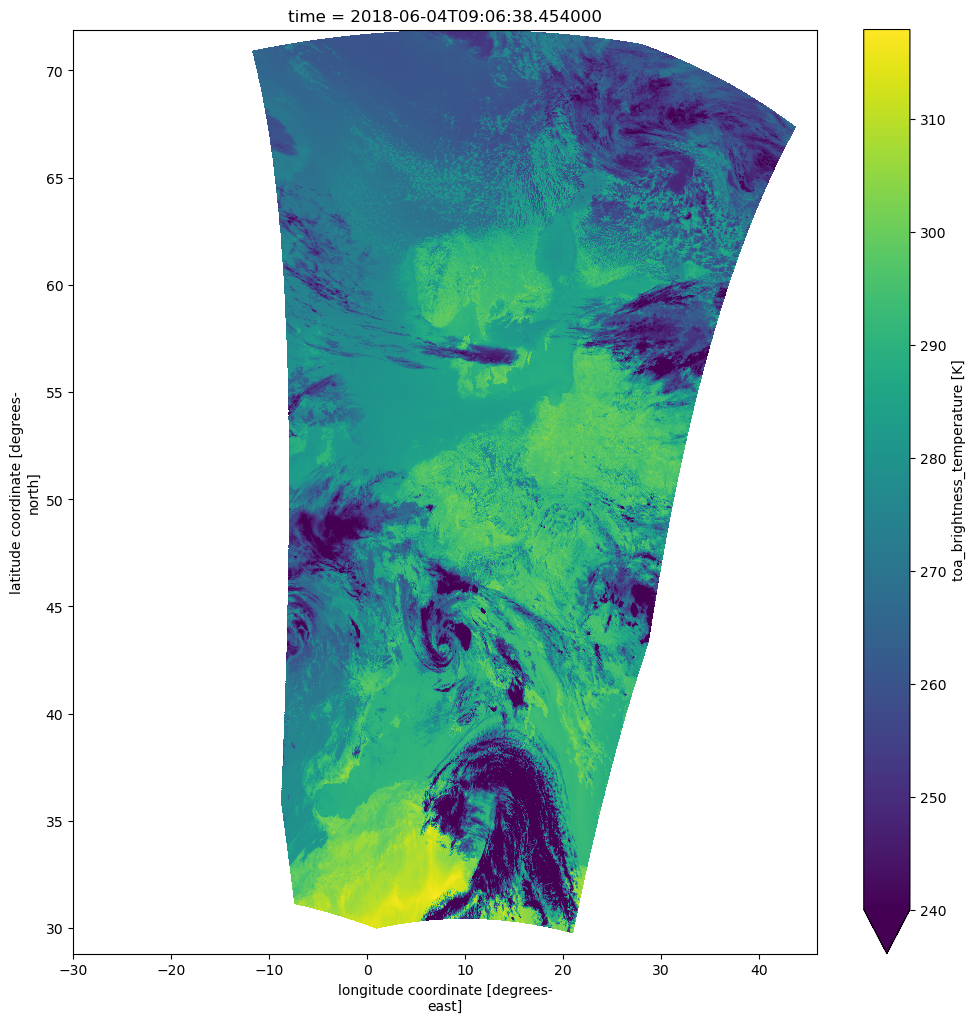

In [8]:
# plot channel4, temperatures are in Kelvin 
sat_image['image4'].plot(x='lon', y='lat', figsize=(12,12), vmin=240);

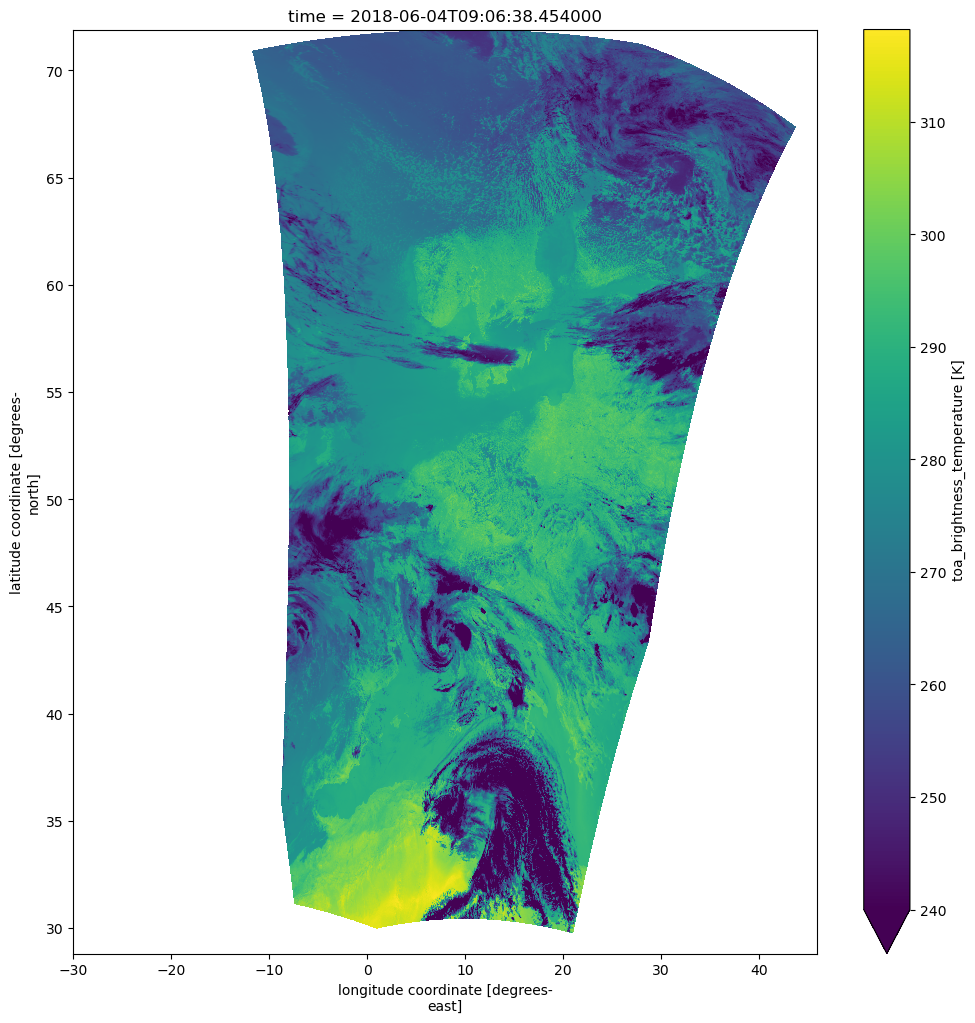

In [9]:
# plot channel5, temperatures are in Kelvin 
sat_image['image5'].plot(x='lon', y='lat', figsize=(12,12), vmin=240);

- What can be observed from the thermal channels?

Clouds are much cooler than the land/sea.

There is a temperature gradient in Europe, with warmer temperatures in the south.

In June, the sea is generally cooler than the surrounding land.

In [10]:
# load a data cube: load the whole month
# runtime: approx 2 minutes
data_cube = xr.open_mfdataset(onlyfiles, engine="netcdf4")
data_cube

<xarray.Dataset>
Dimensions:      (time: 46, y: 4700, x: 3200, bnds_1d: 2)
Coordinates:
    lat          (y, x) float32 dask.array<chunksize=(4700, 3200), meta=np.ndarray>
    lon          (y, x) float32 dask.array<chunksize=(4700, 3200), meta=np.ndarray>
  * time         (time) datetime64[ns] 2018-06-01T08:31:35.030000 ... 2018-06...
  * x            (x) int64 0 1 2 3 4 5 6 ... 3193 3194 3195 3196 3197 3198 3199
  * y            (y) int64 0 1 2 3 4 5 6 ... 4693 4694 4695 4696 4697 4698 4699
Dimensions without coordinates: bnds_1d
Data variables:
    azimuthdiff  (time, y, x) float32 dask.array<chunksize=(1, 4700, 3200), meta=np.ndarray>
    image0       (time, y, x) float32 dask.array<chunksize=(1, 4700, 3200), meta=np.ndarray>
    image1       (time, y, x) float32 dask.array<chunksize=(1, 4700, 3200), meta=np.ndarray>
    image2       (time, y, x) float32 dask.array<chunksize=(1, 4700, 3200), meta=np.ndarray>
    image3       (time, y, x) float32 dask.array<chunksize=(1, 4700, 3200), meta=np.ndarray>
    image4       (time, y, x) float32 dask.array<chunksize=(1, 4700, 3200), meta=np.ndarray>
    image5       (time, y, x) float32 dask.array<chunksize=(1, 4700, 3200), meta=np.ndarray>
    satazimuth   (time, y, x) float32 dask.array<chunksize=(1, 4700, 3200), meta=np.ndarray>
    satzenith    (time, y, x) float32 dask.array<chunksize=(1, 4700, 3200), meta=np.ndarray>
    sunazimuth   (time, y, x) float32 dask.array<chunksize=(1, 4700, 3200), meta=np.ndarray>
    sunzenith    (time, y, x) float32 dask.array<chunksize=(1, 4700, 3200), meta=np.ndarray>
    time_bnds    (time, bnds_1d) datetime64[ns] dask.array<chunksize=(1, 2), meta=np.ndarray>
Attributes: (12/21)
    description:                            AVHRR-3 1
    id_tag:                                 ch_r06
    sun_earth_distance_correction_applied:  True
    sun_zenith_angle_correction_applied:    True
    calib_coeffs_version:                   PATMOS-x, v2017r1
    calibration:                            reflectance
    ...                                     ...
    platform:                               metop2
    platform_name:                          metop2
    sensor:                                 avhrr
    source:                                 rsgb eu1km v04
    start_time:                             2018-06-01 08:31:35
    Conventions:                            CF-1.7

### Coordinate conversion

Utils.py contains all the functions to reproject the data

In [11]:
# geotransform from GDAL
# https://gdal.org/tutorials/geotransforms_tut.html

"""Utilities for AVHRR data
    Author: Helga Weber, RSGB (20180702)"""
RSGB_GT = (-1700000.0, 1000.0, 0.0, 8600000.0, 0.0, -1000.0)
RSGB_WKT = 'PROJCS["unnamed",GEOGCS["WGS 84",DATUM["unknown",SPHEROID["WGS84",6378137,298.257223563],TOWGS84[0,0,0,0,0,0,0]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433]],PROJECTION["Lambert_Conformal_Conic_2SP"],PARAMETER["standard_parallel_1",40],PARAMETER["standard_parallel_2",55],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",10],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["Meter",1]]'


def ll2RSGB(lon, lat):
    """Convert from RSGB SAPS col/row to lon/lat
    Author: Helga Weber, RSGB (20180702)"""
    RSGB_SRS = '+proj=lcc +lat_1=40 +lat_2=55 +lat_0=0 +lon_0=10 +x_0=0 +y_0=0 +ellps=WGS84 +towgs84=0,0,0,0,0,0,0 +units=m +no_defs'
    rsgb_proj4 = pyproj.Proj(RSGB_SRS)
    x, y = rsgb_proj4(lon, lat)
    col, row = xy2RSGB(x, y)
    return col, row


def xy2RSGB(x, y):
    """Convert LCC x,y coordiantes to RSGB SAPS col, row pixels
    Author: Helga Weber, RSGB (20180702)"""
    RSGB_GT = (-1700000.0, 1000.0, 0.0, 8600000.0, 0.0, -1000.0)
    col, row = xy2pix(x, y, RSGB_GT)
    return col, row


def RSGB2xy(col, row):
    """Convert RSGB SAPS col, row coordinates to LCC x,y
    Author: Helga Weber, RSGB (20180702)"""
    RSGB_GT = (-1700000.0, 1000.0, 0.0, 8600000.0, 0.0, -1000.0)
    x, y = pix2xy(col, row, RSGB_GT)
    return x, y


def xy2pix(x, y, GT):
    """Use affine transform to calculate row, col from x, y coordinates
    from http://www.gdal.org/classGDALDataset.html#a5101119705f5fa2bc1344ab26f66fd1d
    This drops the rotation terms.
    Author: Helga Weber, RSGB (20180702)"""
    col = np.round((x - GT[0]) / GT[1]).astype(int)
    row = np.round((y - GT[3]) / GT[5]).astype(int)
    return col, row


def pix2xy(col, row, GT):
    """Use affine transform to calculate x, y from row, col coordinates
    x = GT[0] + col * GT[1] + row * GT[2];
    y = GT[3] + col * GT[4] + row * GT[5];
    from http://www.gdal.org/classGDALDataset.html#a5101119705f5fa2bc1344ab26f66fd1d
    This drops the terms that account for rotation.
    Author: Helga Weber, RSGB (20180702)"""
    x = GT[0] + col * GT[1]
    y = GT[3] + row * GT[5]
    return x, y



def eu1km_v04_lcc2ll(scn):
    """Reproject unibe/RSGB AVHRR eu1km v04 l1c data, stored as netCDF format to lon/lat
    Author: Helga Weber, RSGB (20220707)"""
    # rio.reproject requires dropping of "time_bnds", "lat", "lon" to 
    scn = scn.drop(["time_bnds", "lat", "lon"])
    # Convert x,y pixel coordinates to col,row (x,y projected coordinates)
    col,row = RSGB2xy(scn.x, scn.y)
    scn.coords['x'] = col
    scn.coords['y'] = row
    scn.x['standard_name'] = 'projection_x_coordinate'
    scn.y['standard_name'] = 'projection_y_coordinate'
    # Add RSGB LCC wkt_str (not in place yet)
    scn_proj = scn.rio.write_crs(rasterio.crs.CRS.from_wkt(RSGB_WKT), inplace=True)
    # Reproject scene to lon/lat coordinate system
    scn_ll = scn_proj.rio.reproject("epsg:4326")
    return scn_ll

In [12]:
# convert lon/lat coordinates to RSGB LCC pixel coordinates
# coordinates subset Svartberget Research Station (Sweden), for example. Any coordinates within Europe can be selected.
lat = 64.2443
lon = 19.7663
# convert ll to col,row
col,row = ll2RSGB(lon, lat)
col,row

(2192, 885)

In [13]:
# Select one pixel
data_cube['image5'].sel(x=2192, y=885, method='nearest')

<xarray.DataArray 'image5' (time: 46)>
dask.array<getitem, shape=(46,), dtype=float32, chunksize=(1,), chunktype=numpy.ndarray>
Coordinates:
    lat      float32 dask.array<chunksize=(), meta=np.ndarray>
    lon      float32 dask.array<chunksize=(), meta=np.ndarray>
  * time     (time) datetime64[ns] 2018-06-01T08:31:35.030000 ... 2018-06-30T...
    x        int64 2192
    y        int64 885
Attributes: (12/17)
    description:                            AVHRR-3 5
    id_tag:                                 ch_tb12
    sun_earth_distance_correction_applied:  True
    sun_zenith_angle_correction_applied:    True
    calib_coeffs_version:                   PATMOS-x, v2017r1
    calibration:                            brightness_temperature
    ...                                     ...
    orbit_number:                           60274
    platform_name:                          metop2
    resolution:                             1000
    sensor:                                 avhrr-3
    start_time:                             2018-06-01 08:31:35.030000
    sun_earth_distance_correction_factor:   1.0288506089479839

In [14]:
test = data_cube['image5'].sel(x=2192, y=885, method='nearest').isel(time=slice(0,30))

In [15]:
test

<xarray.DataArray 'image5' (time: 30)>
dask.array<getitem, shape=(30,), dtype=float32, chunksize=(1,), chunktype=numpy.ndarray>
Coordinates:
    lat      float32 dask.array<chunksize=(), meta=np.ndarray>
    lon      float32 dask.array<chunksize=(), meta=np.ndarray>
  * time     (time) datetime64[ns] 2018-06-01T08:31:35.030000 ... 2018-06-20T...
    x        int64 2192
    y        int64 885
Attributes: (12/17)
    description:                            AVHRR-3 5
    id_tag:                                 ch_tb12
    sun_earth_distance_correction_applied:  True
    sun_zenith_angle_correction_applied:    True
    calib_coeffs_version:                   PATMOS-x, v2017r1
    calibration:                            brightness_temperature
    ...                                     ...
    orbit_number:                           60274
    platform_name:                          metop2
    resolution:                             1000
    sensor:                                 avhrr-3
    start_time:                             2018-06-01 08:31:35.030000
    sun_earth_distance_correction_factor:   1.0288506089479839

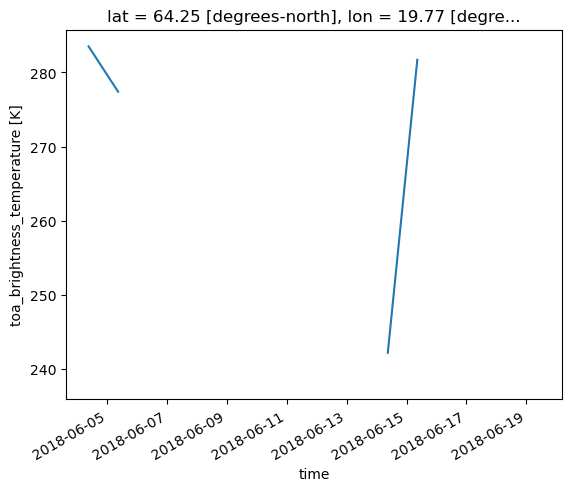

In [16]:
test.plot();

In [17]:
test.values

array([      nan,       nan,       nan,       nan,       nan, 283.5    ,
       277.4    ,       nan, 257.69998,       nan,       nan,       nan,
             nan,       nan,       nan,       nan,       nan,       nan,
             nan, 242.2    , 281.69998,       nan,       nan,       nan,
             nan,       nan,       nan, 238.2    ,       nan,       nan],
      dtype=float32)

Why are there so many holes ?

In [18]:
# There are different options for plotting, depending if the image is kept in its original projection or re-projected to EPSG:4326 (WGS84, lat, lon)

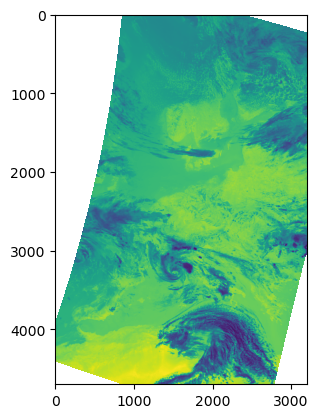

In [19]:
plt.imshow(sat_image['image4'][0,:,:]);

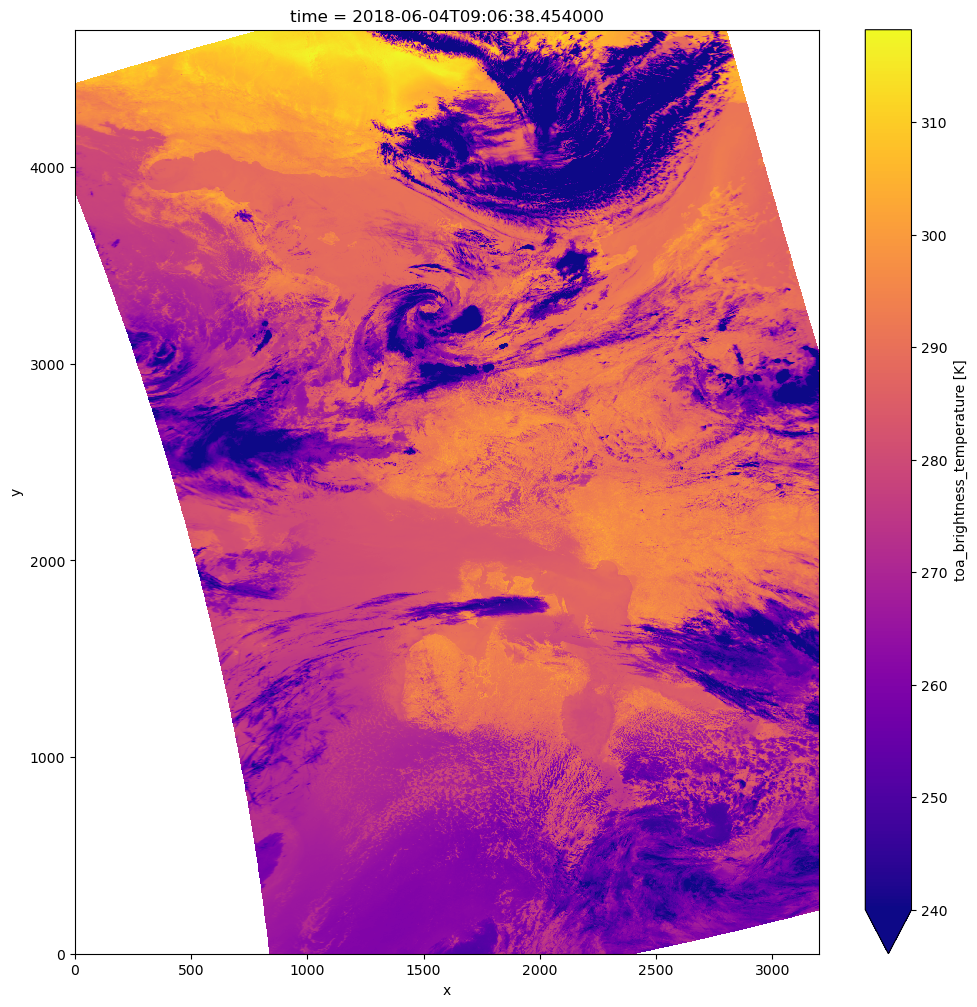

In [ ]:
# https://matplotlib.org/stable/users/explain/colors/colormaps.html ,  better colormaps: https://www.fabiocrameri.ch/colourmaps/
sat_image['image5'].plot(figsize=(12,12), cmap='plasma', vmin=240, x='x', y='y');

### Select an area of interest

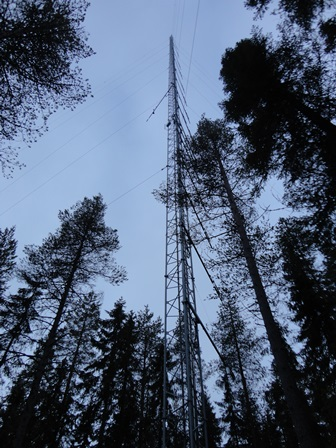


### Svartberget (Sweden)

Located at 64,26°N ; 19,77°E

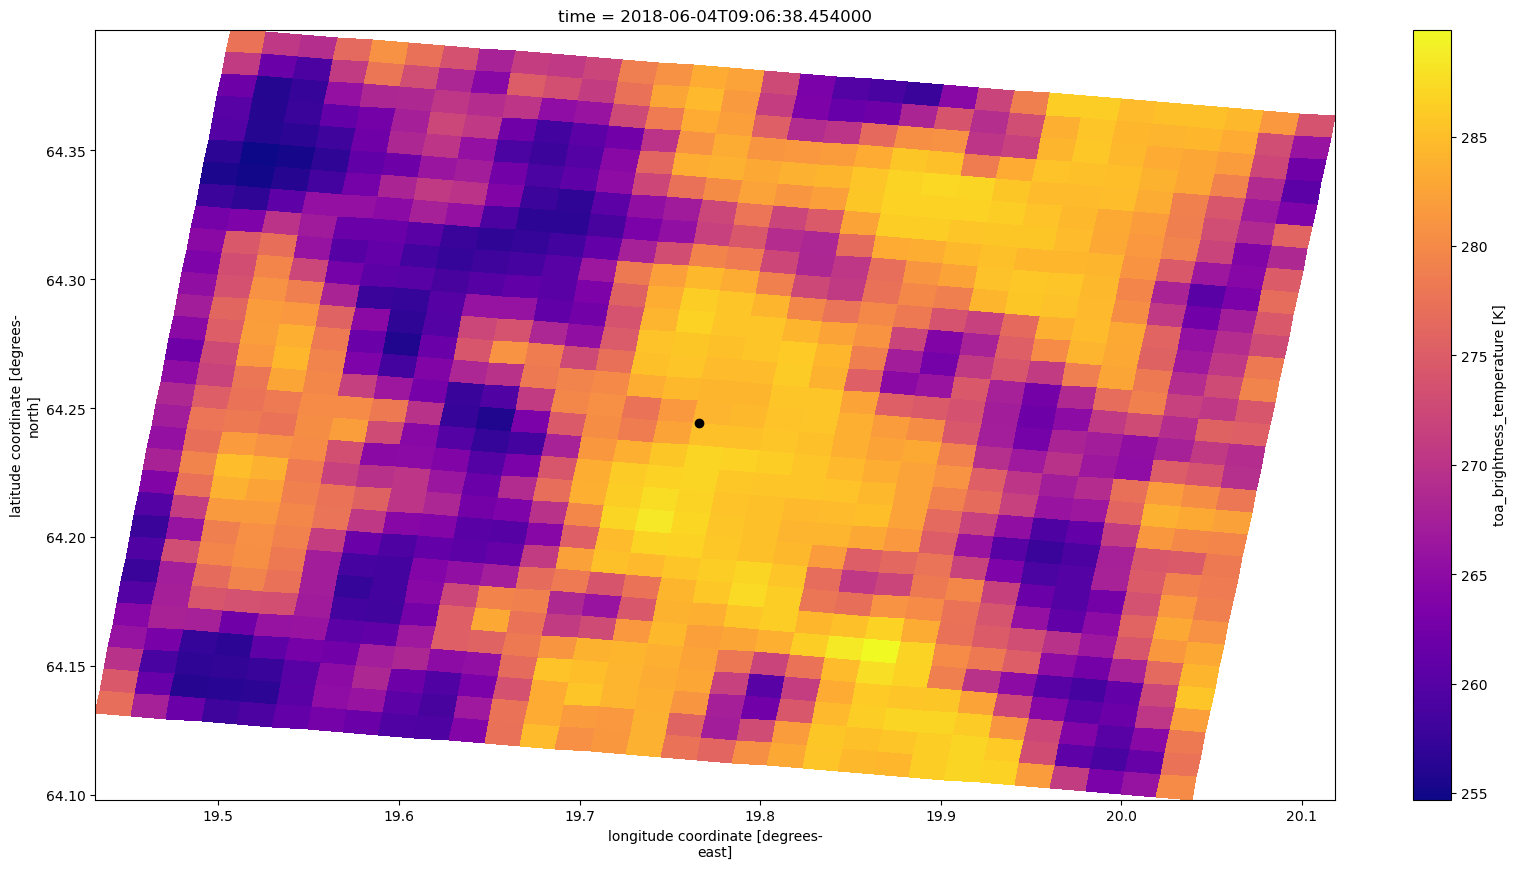

In [21]:
# Enter "coordinates" of Svartberget Research Station (pixel indices)
site_lat = 885
site_lon = 2192
lat = 64.2443
lon = 19.7663


fig, axs = plt.subplots(1, figsize=(20,10))
# Slice the data using the coordinates (quick test)
ds_slice = sat_image.image4[0].sel(y=slice(site_lat-15, site_lat+15), x=slice(site_lon-15, site_lon+15))


# and plot it
ds_slice.plot(x='lon', y='lat', cmap='plasma');
# plot the station location
axs.scatter(lon, lat, color='black');

- Where do you expect the presence of clouds?
- And how would you proceed ?

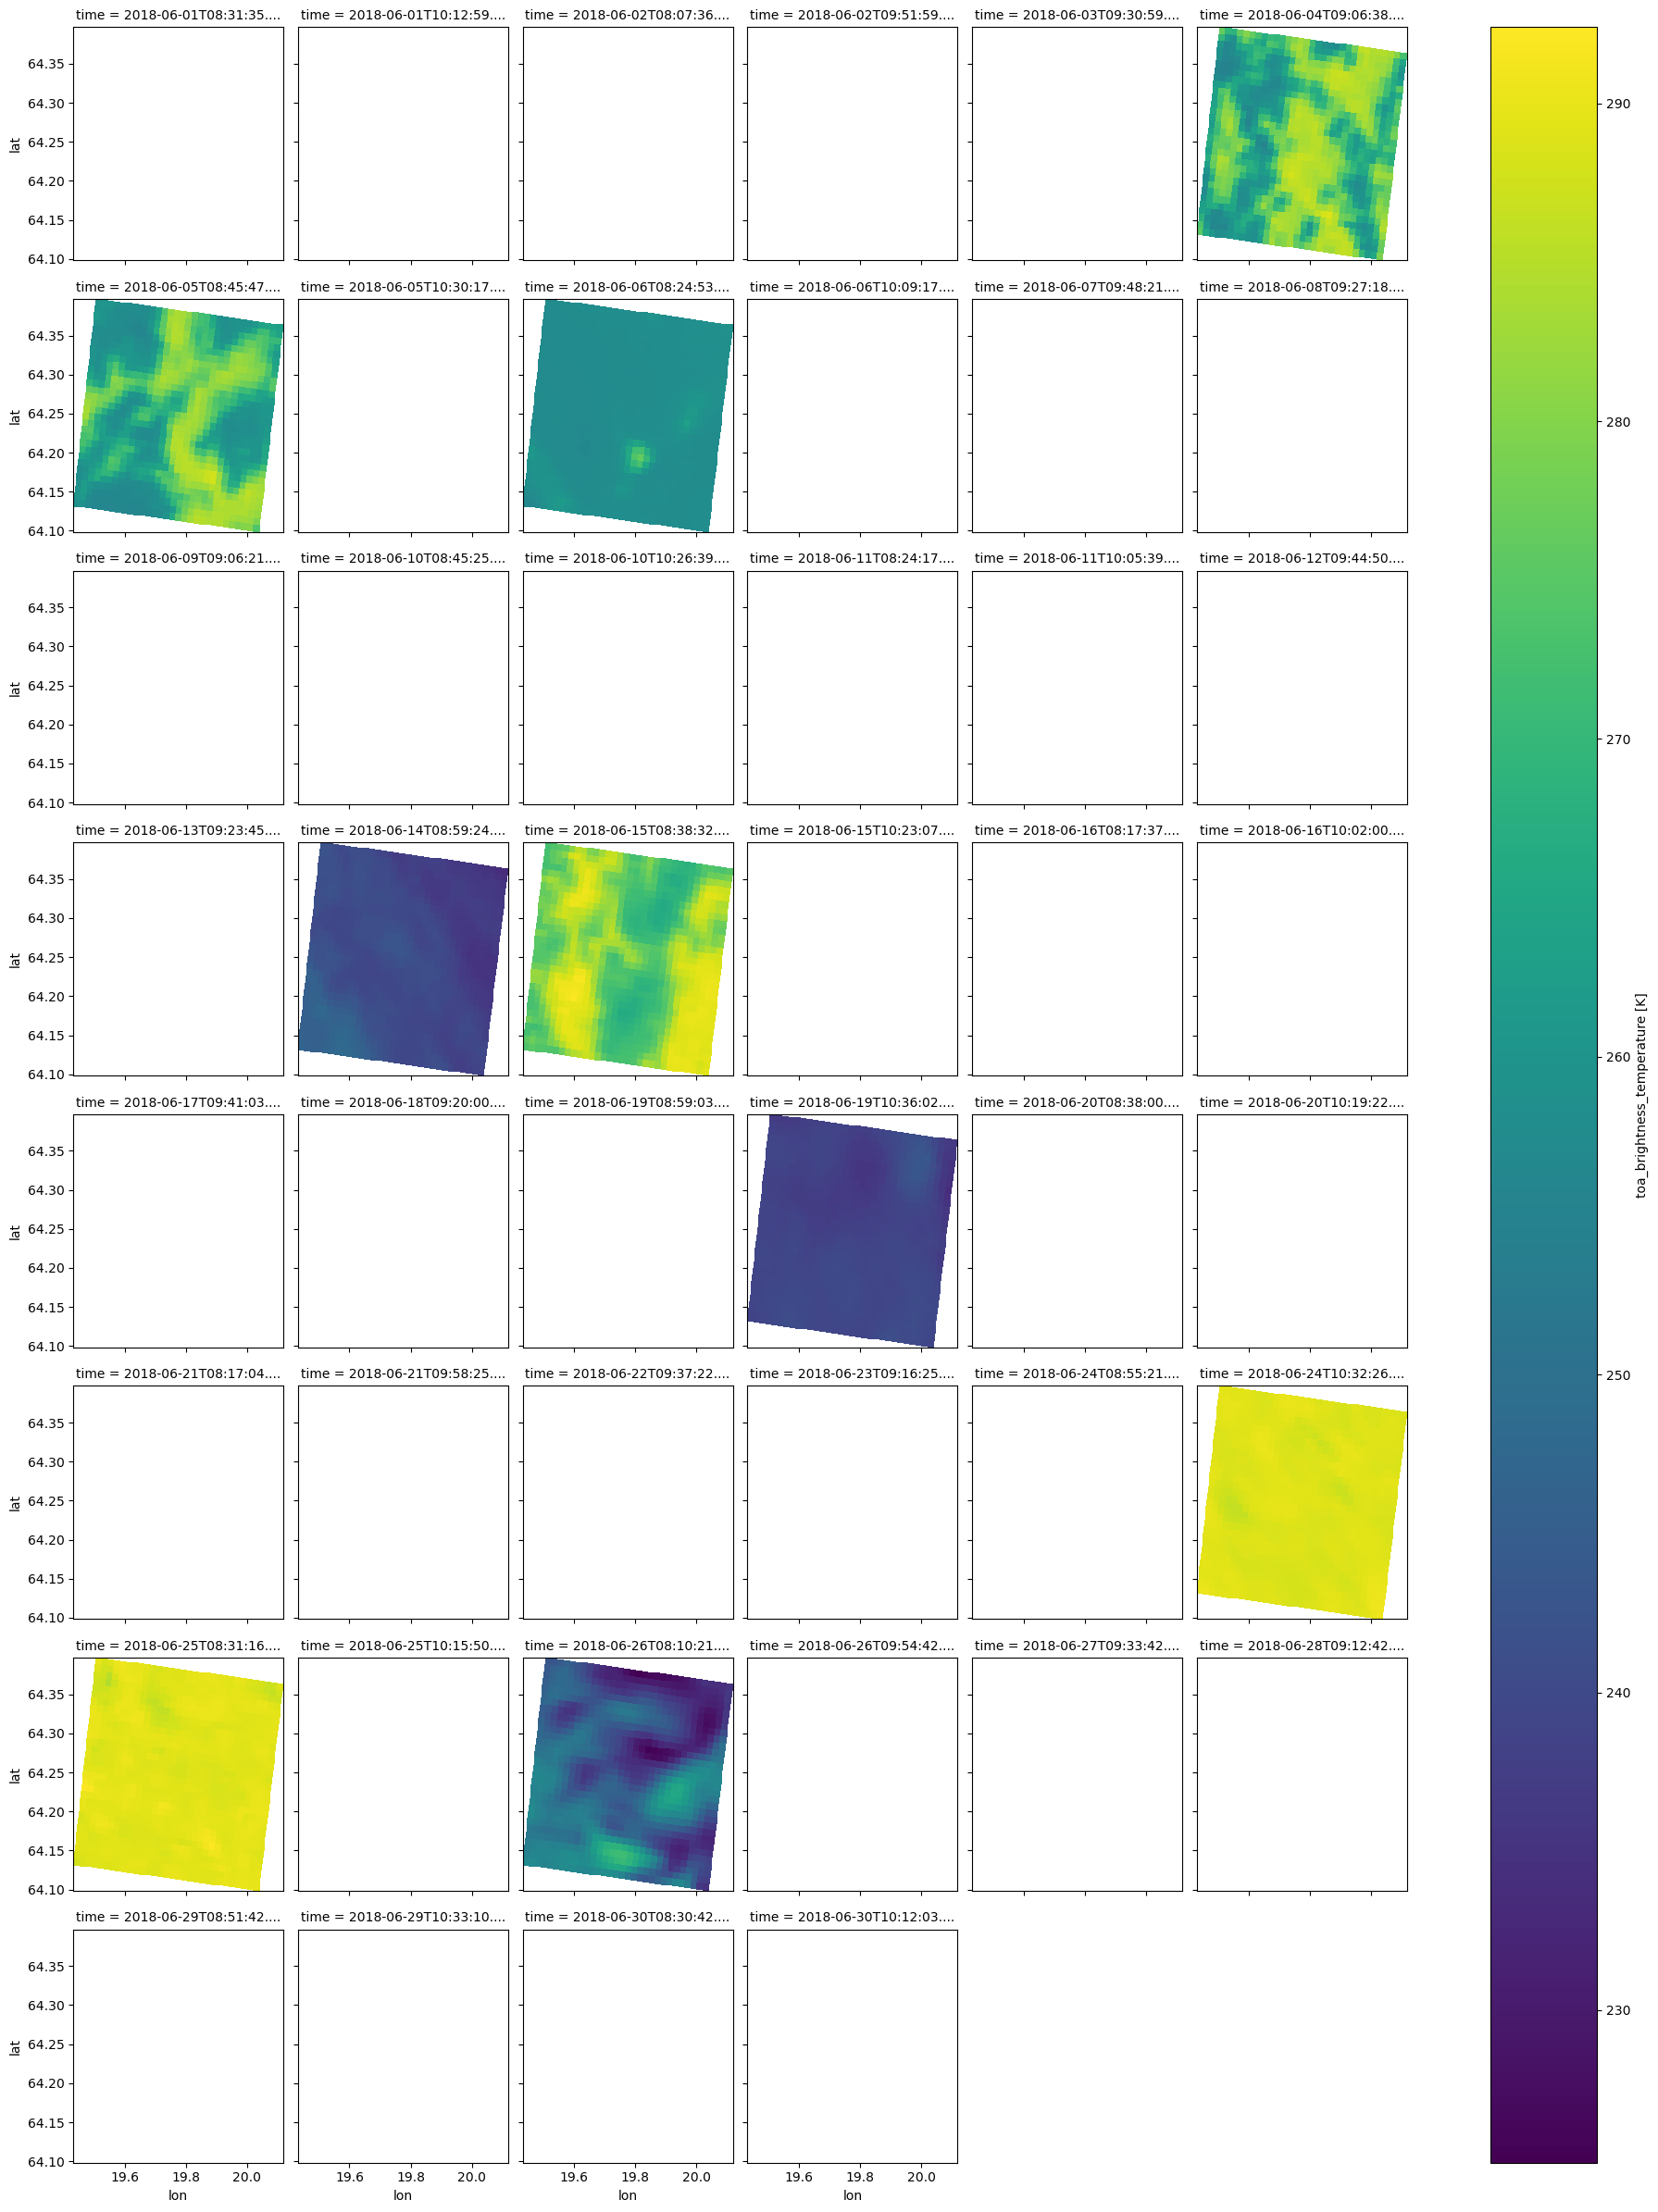

In [22]:
# And to answer the previous question, why there were so many holes in the time series, a plot of the data cube can be practical

data_cube['image5'].sel(y=slice(site_lat-15, site_lat+15), x=slice(site_lon-15, site_lon+15)).plot(x="lon", y="lat", col="time", col_wrap=6);